# Capstone Project for Course

## Import Libraries

In [15]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

## Task 3 

Load the Dataset

In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

View Data set

In [18]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [19]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


## Task 4

Boxplot for Median value of owner-occupied home

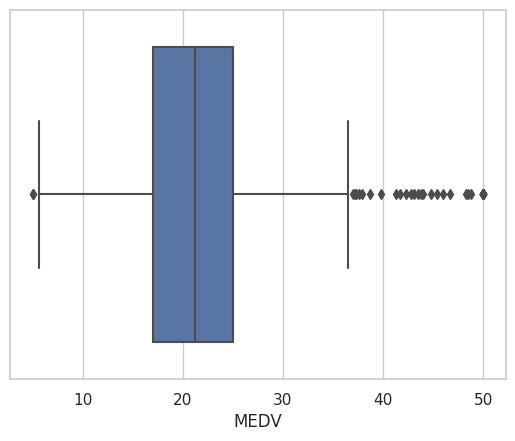

In [20]:
bxPlt = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

Barplot for Charles River Dummy Variable

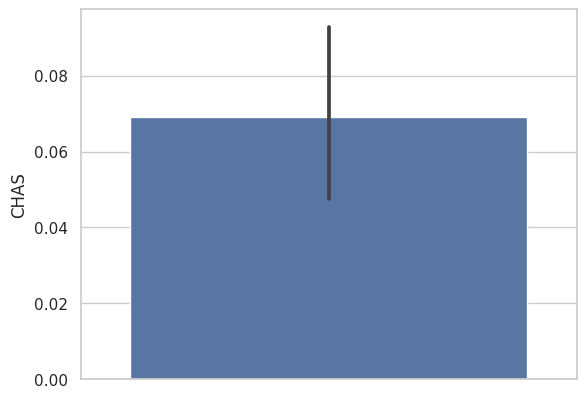

In [21]:
sns.set(style="whitegrid")
barPlt = sns.barplot(y ="CHAS", data=boston_df)
plt.show()

Discretize Age Variable into: Below 35 yearls old, Between 35 and  70 years old, Above 70 years old

In [22]:
age_discrete = pd.cut(boston_df["AGE"], [0, 35, 70, boston_df["AGE"].max() + 1], False, ["Below 35", "Between 35 and 70", "70 and older"])

A boxplot for the MEDV variable vs the AGE variable. 

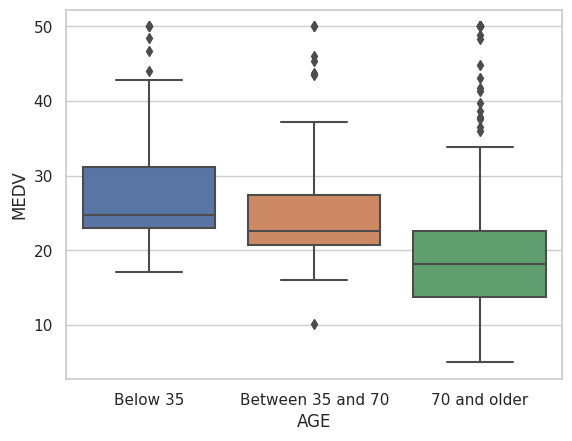

In [23]:
bxPlot = sns.boxplot(x = age_discrete, y ='MEDV', data = boston_df)
plt.show()

Plot shows that as age increases, the median MEDV vaue decreases. 

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

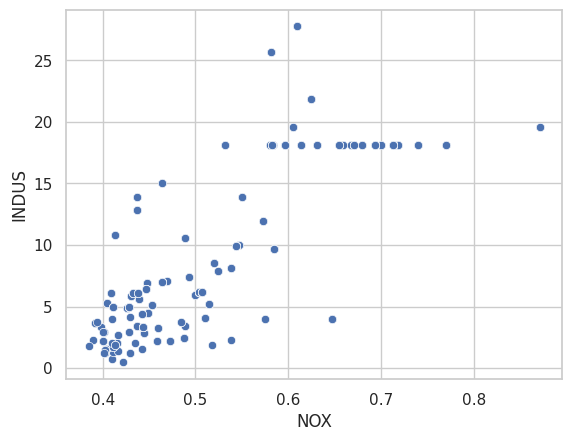

In [24]:
splot = sns.scatterplot(x  = "NOX", y = "INDUS", data = boston_df)
plt.show()

Scatter Plot shows that there is a posistive linear relationship between Nitric Oxide concentartion and INDUS. 

Create a histogram for the pupil to teacher ratio variable

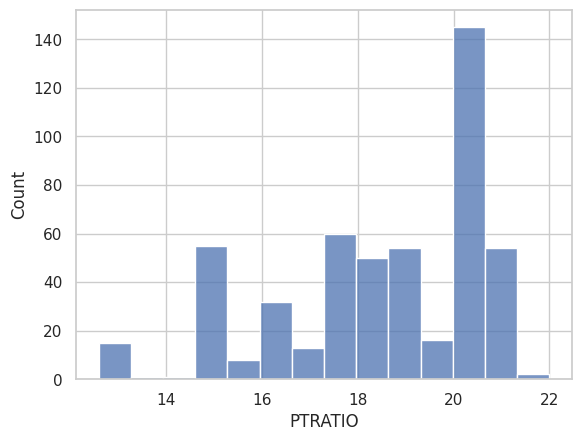

In [25]:
hstPlt = sns.histplot(x ='PTRATIO', data = boston_df)
plt.show()

The histogram shows that the PTRATIO of 20-21 has the greatest frequencyof occurance. 

## Task 5

Q1) Is there a significant difference in median value of houses bounded by the Charles river or not? 

    Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river. 
    Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river.

<ipython-input-26-7fdabc3a0b16>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  mdValue_hist = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

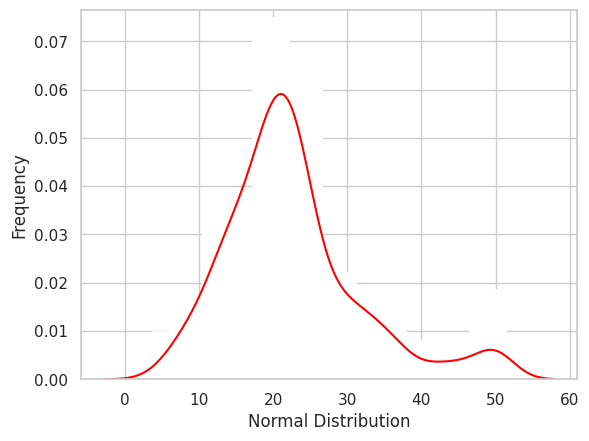

In [26]:
mdValue_hist = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
mdValue_hist.set(xlabel='Normal Distribution', ylabel='Frequency')

In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')
# Since te p-value is < 0.05, we cannot assume that  the variance is equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

T-test for independent samples

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p value is significantly less than the alpha value, .05, we reject the null hypothesis and conclude there is a significant difference between the median value of houses bounded by the Charles river or not. 

Q2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

    Null Hypothesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [29]:
# Discretize age groups
boston_df.loc[(boston_df['AGE'] <= 35.0), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35.0)&(boston_df['AGE'] < 70.0), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70.0), 'age_group'] = '70 years and older'

In [30]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], center = 'mean')
# Since the p-value is greater than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Seperate 3 samples into its own variables

In [31]:
thirty_five_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_five_seventy =  boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older =  boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Run a one-way ANOVA

In [32]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Q3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

    Null Hypothesis: Nitric oxide concentration is not correlated with proportion of non-retail business acres per town. 
    Alternative Hypothesis: Nitric oxide concentration is correlated with proportion of non-retail business acres per town.

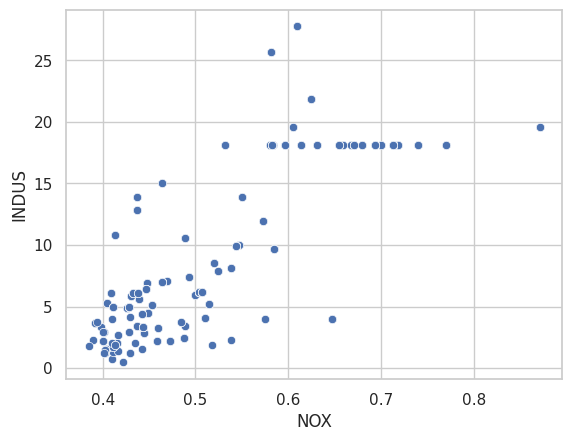

In [33]:
# Use a scatter plot and Pearson correlation test to show correlation since botha are continuous variables. 
sns.scatterplot(x ="NOX", y ="INDUS", data = boston_df)
plt.show()

In [34]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

**Conclusion:** Since the p-value (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Q4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

    Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
    Alternative Hypothesis: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [35]:
# Perform regression analysis 
X = boston_df["DIS"]
Y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        12:23:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# R-squared = 0.062. Now find correlation coefficient
np.sqrt(0.062)

0.24899799195977465

**Conclusion:** Coeficient valueof 18.39 says there is a positive correlation. Correlation coefficient of approximately 0.249 says there will be little impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.